In [23]:
# Created By Rupesh Basnet
# Testing out some pre-existing resources for pre-processing the tweets for WITBragDay as a framework for other 
# past events
# coding: utf-8

In [1]:
import csv
import nltk
import pandas as pd

In [122]:
data = pd.read_csv("WITBragDay.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

In [123]:
# Viewing the top 5 data
data.head(5)
data.columns

Index([u'coordinates', u'created_at', u'hashtags', u'media', u'urls',
       u'favorite_count', u'id', u'in_reply_to_screen_name',
       u'in_reply_to_status_id', u'in_reply_to_user_id', u'lang', u'place',
       u'possibly_sensitive', u'retweet_count', u'reweet_id',
       u'retweet_screen_name', u'source', u'text', u'tweet_url',
       u'user_created_at', u'user_screen_name', u'user_default_profile_image',
       u'user_description', u'user_favourites_count', u'user_followers_count',
       u'user_friends_count', u'user_listed_count', u'user_location',
       u'user_name', u'user_screen_name.1', u'user_statuses_count',
       u'user_time_zone', u'user_urls', u'user_verified'],
      dtype='object')

In [124]:
data.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Thu Aug 17 23:46:00 +0000 2017,WITBragDay,NaN,NaN,0,898330098876661760,NaN,NaN,NaN,...,5277,1006,509,San Francisco,Carina C. Zona,cczona,69411,NaN,http://patreon.com/cczona,false
1,NaN,Sun Aug 13 08:31:30 +0000 2017,NaN,NaN,NaN,0,896650407942008832,NaN,NaN,NaN,...,168,341,2,NaN,lowkey☠️,pahareya,12512,NaN,NaN,false
2,NaN,Thu Aug 17 22:12:33 +0000 2017,NaN,NaN,NaN,0,898306582819160064,NaN,NaN,NaN,...,296,740,7,"London, England",ash,ashiesdollparts,18869,NaN,https://Instagram.com/ashiesdollparts,false
3,NaN,Thu Aug 17 23:23:29 +0000 2017,WITBragDay,NaN,NaN,0,898324433001103361,NaN,NaN,NaN,...,1499,607,83,NaN,Peter Barfuss 𒀱,bofh453,55620,NaN,NaN,false
4,NaN,Thu Aug 17 21:52:20 +0000 2017,NaN,NaN,NaN,0,898301492423081984,NaN,NaN,NaN,...,3331,1729,60,"London, England",Kimberly M,kimpmurrell,7582,NaN,NaN,false


In [125]:
non_retweet = data[data['retweet_screen_name'].isnull()]

In [126]:
non_retweet.shape

(4409, 34)

In [127]:
data.shape
# It looks like alot of the tweets were retweets which would distort the data

(29512, 34)

In [128]:
clean_data = non_retweet.filter(items = ["created_at","hashtags","text","favorite_count","lang","place","geo","user_location","retweet_count", "retweet_screen_name"])

In [129]:
clean_data.head(5)

,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name
8,Sun Aug 13 08:32:29 +0000 2017,women WITBragDay,3 degrees in building industry and they reject...,9,en,NaN,"Wroclaw, Poland",2,NaN
13,Thu Aug 17 23:34:25 +0000 2017,WITBragDay,@azimman @LaunchDarkly sounds like you should ...,1,en,NaN,/usr/local/sin,0,NaN
16,Thu Aug 17 22:15:48 +0000 2017,WITBragDay,My coding knowledge makes a difference and imp...,6,en,NaN,"Zionsville, IN",2,NaN
44,Thu Aug 17 23:25:01 +0000 2017,WITBragDay,Built a ECS JSON-generating container definiti...,3,en,NaN,"Wellington, New Zealand",2,NaN
46,Thu Aug 17 23:22:06 +0000 2017,WITBragDay,Recruiters should definitely be scrolling thro...,203,en,NaN,/usr/local/sin,76,NaN


In [130]:
df = clean_data

In [131]:
df.columns

Index([u'created_at', u'hashtags', u'text', u'favorite_count', u'lang',
       u'place', u'user_location', u'retweet_count', u'retweet_screen_name'],
      dtype='object')

In [132]:
df.dtypes

created_at             object
hashtags               object
text                   object
favorite_count         object
lang                   object
place                  object
user_location          object
retweet_count          object
retweet_screen_name    object
dtype: object

In [133]:
# We will have to convert the object created_at into a datetime for now
test = pd.to_datetime('Thu Aug 17 23:46:00 +0000 2017', format='%a %b %d %H:%M:%S +0000 %Y')
# Still kept the original created_at date for later modification
df['date'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

In [134]:
df.dtypes

created_at                     object
hashtags                       object
text                           object
favorite_count                 object
lang                           object
place                          object
user_location                  object
retweet_count                  object
retweet_screen_name            object
date                   datetime64[ns]
dtype: object

In [135]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [136]:
df.head(5)

,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date
8,Sun Aug 13 08:32:29 +0000 2017,women WITBragDay,3 degrees in building industry and they reject...,9,en,NaN,"Wroclaw, Poland",2,NaN,2017-08-13 08:32:29
13,Thu Aug 17 23:34:25 +0000 2017,WITBragDay,@azimman @LaunchDarkly sounds like you should ...,1,en,NaN,/usr/local/sin,0,NaN,2017-08-17 23:34:25
16,Thu Aug 17 22:15:48 +0000 2017,WITBragDay,My coding knowledge makes a difference and imp...,6,en,NaN,"Zionsville, IN",2,NaN,2017-08-17 22:15:48
44,Thu Aug 17 23:25:01 +0000 2017,WITBragDay,Built a ECS JSON-generating container definiti...,3,en,NaN,"Wellington, New Zealand",2,NaN,2017-08-17 23:25:01
46,Thu Aug 17 23:22:06 +0000 2017,WITBragDay,Recruiters should definitely be scrolling thro...,203,en,NaN,/usr/local/sin,76,NaN,2017-08-17 23:22:06


In [137]:
# Changing the settings of pd to view all the tweet's text
pd.set_option('display.max_colwidth', -1)

In [138]:
df.head(5).text

8     3 degrees in building industry and they rejected me because #women. IT industry welcomed me with open arms. Not a single regret #WITBragDay
13    @azimman @LaunchDarkly sounds like you should look at the #WITBragDay tag :P                                                               
16    My coding knowledge makes a difference and improves the lives of my coworkers and our customers. And it's the coolest feeling. #WITBragDay 
44    Built a ECS JSON-generating container definition module entirely in Terraform, because why would you not. #WITBragDay                      
46    Recruiters should definitely be scrolling through #WITBragDay for their lists. Tons of awesome talent in there.                            
Name: text, dtype: object

In [60]:
df.to_csv('WITBrag_Clean_Noretweets.csv')

In [5]:
df = pd.read_csv("WITBrag_Clean_Noretweets.csv")

In [3]:
#testing tokenization
from nltk.tokenize import word_tokenize
test_tweet = 'RT @alicegoldfuss: So happy to hear women getting recruiter pings after #WITBragDay :D'
word_tokenize(test_tweet)
# Note is punkt is not installed just use the terminal to download it 

['RT',
 '@',
 'alicegoldfuss',
 ':',
 'So',
 'happy',
 'to',
 'hear',
 'women',
 'getting',
 'recruiter',
 'pings',
 'after',
 '#',
 'WITBragDay',
 ':',
 'D']

In [2]:
# Emojis and mentions and hashtags are being tokenized
# Taken from a blog https://marcobonzanini.com/2015/03/09/mining-twitter-data-with-python-part-2/
import re

emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

def remove_emoji(data):
    if not data:
        return data
    if not isinstance(data, basestring):
        return data
    try:
    # UCS-4
        patt = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    except re.error:
    # UCS-2
        patt = re.compile(u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])')
    return patt.sub('', data)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    s = s.decode('unicode-escape').encode('latin1').decode('utf8')
    data = remove_emoji(s)
    tokens = tokenize(data)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

test_tweet = 'RT @alicegoldfuss: So happy to hear women getting recruiter pings after #WITBragDay :D'
print (preprocess(test_tweet))

[u'RT', u'@alicegoldfuss', u':', u'So', u'happy', u'to', u'hear', u'women', u'getting', u'recruiter', u'pings', u'after', u'#WITBragDay', u':D']


In [150]:
test = df.head(20).text

In [149]:
df.head(2)

,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date
8,Sun Aug 13 08:32:29 +0000 2017,women WITBragDay,3 degrees in building industry and they rejected me because #women. IT industry welcomed me with open arms. Not a single regret #WITBragDay,9,en,NaN,"Wroclaw, Poland",2,NaN,2017-08-13 08:32:29
13,Thu Aug 17 23:34:25 +0000 2017,WITBragDay,@azimman @LaunchDarkly sounds like you should look at the #WITBragDay tag :P,1,en,NaN,/usr/local/sin,0,NaN,2017-08-17 23:34:25


In [4]:
preprocess(test[7])

NameError: name 'test' is not defined

In [154]:
# Removing all stop words
from nltk.corpus import stopwords
import string

punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via']

In [155]:
import operator 
from collections import Counter

terms_all = [term for term in preprocess('RT @alicegoldfuss: So happy to hear women getting recruiter pings after #WITBragDay :D')]
terms_stop = [term for term in preprocess('RT @alicegoldfuss: So happy to hear women getting recruiter pings after #WITBragDay :D') if term not in stop]

In [156]:
terms_all

[u'RT',
 u'@alicegoldfuss',
 u':',
 u'So',
 u'happy',
 u'to',
 u'hear',
 u'women',
 u'getting',
 u'recruiter',
 u'pings',
 u'after',
 u'#WITBragDay',
 u':D']

In [157]:
terms_stop

[u'RT',
 u'@alicegoldfuss',
 u'So',
 u'happy',
 u'hear',
 u'women',
 u'getting',
 u'recruiter',
 u'pings',
 u'#WITBragDay',
 u':D']

In [158]:
count_all = Counter()
for index, row in df.iterrows():     
    terms_all = [term for term in preprocess(row['text'])]
    # Update the counter
    count_all.update(terms_all)
print(count_all.most_common(5))

[(u'.', 2977), (u'#WITBragDay', 2530), (u'!', 1537), (u',', 1434), (u'to', 1373)]


In [159]:
# Create a Counter Collection
count_all = Counter()
# Iterate over the Dataframe rows
for index, row in df.iterrows():     
    # Get the terms of each tweet while preprocessing it and remove the stop words from the tweet
    terms_stop = [term for term in preprocess(row['text']) if term not in stop and not term.startswith(r"\x")]
    # Update the counter
    count_all.update(terms_stop)
print(count_all.most_common(5))

[(u'#WITBragDay', 2530), (u'I', 1289), (u'women', 358), (u'tech', 346), (u'amp', 330)]


In [13]:
count_all.most_common(20)

[(u'#WITBragDay', 2530),
 (u'I', 1289),
 (u'women', 358),
 (u'tech', 346),
 (u'amp', 330),
 (u'#WiTBragDay', 235),
 (u"I'm", 219),
 (u'The', 200),
 (u'code', 179),
 (u'amazing', 173),
 (u'This', 170),
 (u'hashtag', 169),
 (u'tweets', 163),
 (u'\ufe0f', 159),
 (u'work', 156),
 (u'one', 151),
 (u'awesome', 147),
 (u'first', 143),
 (u'many', 128),
 (u'Thank', 124)]

In [14]:
count_all.pop(u'\ufe0f')

159

In [19]:
count_all.pop(u'So')

123

In [20]:
# Dump the data into a json
import json
# Assign frequency count into a dictionary
dicc = dict(count_all.most_common(20))
# Iterate over the dicitonary and convert it into a JSON structure for D3.js
values = [{"text": k, "size": v} for k, v in dicc.iteritems()]
json.dumps(values)

'[{"text": "code", "size": 179}, {"text": "Thank", "size": 124}, {"text": "I", "size": 1289}, {"text": "many", "size": 128}, {"text": "awesome", "size": 147}, {"text": "work", "size": 156}, {"text": "#WiTBragDay", "size": 235}, {"text": "first", "size": 143}, {"text": "amazing", "size": 173}, {"text": "This", "size": 170}, {"text": "#WITBragDay", "size": 2530}, {"text": "tech", "size": 346}, {"text": "hashtag", "size": 169}, {"text": "tweets", "size": 163}, {"text": "amp", "size": 330}, {"text": "I\'m", "size": 219}, {"text": "one", "size": 151}, {"text": "The", "size": 200}, {"text": "#witbragday", "size": 119}, {"text": "women", "size": 358}]'

In [21]:
# Dump json in another format
import json
dicc = dict(count_all.most_common(20))
values = [{k: v} for k, v in dicc.iteritems()]
json.dumps(values)

'[{"code": 179}, {"Thank": 124}, {"I": 1289}, {"many": 128}, {"awesome": 147}, {"work": 156}, {"#WiTBragDay": 235}, {"first": 143}, {"amazing": 173}, {"This": 170}, {"#WITBragDay": 2530}, {"tech": 346}, {"hashtag": 169}, {"tweets": 163}, {"amp": 330}, {"I\'m": 219}, {"one": 151}, {"The": 200}, {"#witbragday": 119}, {"women": 358}]'

In [1]:
# Another format JSon dump
#import json
#dicc = dict(count_all.most_common())
#json.dumps(dicc)

In [21]:
type(dicc)

dict

In [22]:
# Dump json in another format
import json
dicc = dict(count_all.most_common(40))
values = [{"id": k, "group": 1} for k, v in dicc.iteritems()]
json.dumps(values)

'[{"group": 1, "id": "code"}, {"group": 1, "id": "love"}, {"group": 1, "id": "Thank"}, {"group": 1, "id": "people"}, {"group": 1, "id": "awesome"}, {"group": 1, "id": "\\u200d"}, {"group": 1, "id": "years"}, {"group": 1, "id": "#witbragday"}, {"group": 1, "id": "You"}, {"group": 1, "id": "The"}, {"group": 1, "id": "inspiring"}, {"group": 1, "id": "I\'ve"}, {"group": 1, "id": "#womenintech"}, {"group": 1, "id": "#WITBragDay"}, {"group": 1, "id": "1"}, {"group": 1, "id": "This"}, {"group": 1, "id": "amazing"}, {"group": 1, "id": "2"}, {"group": 1, "id": "tweets"}, {"group": 1, "id": "stories"}, {"group": 1, "id": "\\ud83c"}, {"group": 1, "id": "Women"}, {"group": 1, "id": "brag"}, {"group": 1, "id": "I"}, {"group": 1, "id": "#WiTBragDay"}, {"group": 1, "id": "know"}, {"group": 1, "id": "hashtag"}, {"group": 1, "id": "amp"}, {"group": 1, "id": "I\'m"}, {"group": 1, "id": "one"}, {"group": 1, "id": "My"}, {"group": 1, "id": "day"}, {"group": 1, "id": "women"}, {"group": 1, "id": "great"}, 

In [27]:
count_all_terms_only_once = Counter()
for index, row in df.iterrows():     
    terms_all = [term for term in preprocess(row['text'])]
    terms_single = set(terms_all)
    # Update the counter
    count_all_terms_only_once.update(terms_single)
print(count_all_terms_only_once.most_common(5))

[(u'#WITBragDay', 2523), (u'.', 1817), (u'to', 1133), (u'!', 1120), (u'the', 1083)]


In [28]:
# Only look at the hashtags
count_all_hash = Counter()
for index, row in df.iterrows():     
    terms_hash = [term for term in preprocess(row['text']) 
              if term.startswith('#')]
    # Update the counter
    count_all_hash.update(terms_hash)
print(count_all_hash.most_common(5))

[(u'#WITBragDay', 2530), (u'#WiTBragDay', 235), (u'#witbragday', 119), (u'#womenintech', 104), (u'#WITBragday', 72)]


In [29]:
count_all_term_only = Counter()
for index, row in df.iterrows():     
    terms_only = [term for term in preprocess(row['text']) 
              if term not in stop and
              not term.startswith(('#', '@'))] 
    # Update the counter
    count_all_term_only.update(terms_only)
print(count_all_term_only.most_common(5))

[(u'I', 1289), (u'women', 358), (u'tech', 346), (u'amp', 330), (u"I'm", 219)]


In [30]:
from nltk import bigrams 
 
terms_bigram = bigrams(terms_stop)

In [31]:
count_all_bigram = Counter()
for index, row in df.iterrows():     
    terms_stop = [term for term in preprocess(row['text']) if term not in stop]
    # Update the counter
    terms_bigram = bigrams(terms_stop)
    count_all_bigram.update(terms_bigram)
print(count_all_bigram.most_common(5))

[((u'women', u'tech'), 82), ((u'#WITBragDay', u'I'), 82), ((u'#WITBragDay', u'tweets'), 77), ((u'I', u'love'), 51), ((u'The', u'latest'), 50)]


In [32]:
import json
dicc = dict(count_all_bigram.most_common(40))
values = [{"target": k[0], "source": k[1], "strength": v/100.0} for k, v in dicc.iteritems()]
json.dumps(values)

'[{"source": "hashtag", "strength": 0.37, "target": "#WITBragDay"}, {"source": "#WITBragDay", "strength": 0.23, "target": "check"}, {"source": "#WITBragDay", "strength": 0.21, "target": "Loving"}, {"source": "tweets", "strength": 0.77, "target": "#WITBragDay"}, {"source": "\\u200d", "strength": 0.38, "target": "\\u200d"}, {"source": "From", "strength": 0.21, "target": "King"}, {"source": "tech", "strength": 0.82, "target": "women"}, {"source": "You", "strength": 0.2, "target": "Thank"}, {"source": "women", "strength": 0.33, "target": "amazing"}, {"source": "#WITBragDay", "strength": 0.21, "target": "Proud"}, {"source": "n", "strength": 0.24, "target": "\\u00fc"}, {"source": "industry", "strength": 0.22, "target": "software"}, {"source": "got", "strength": 0.2, "target": "I"}, {"source": "#WITBragDay", "strength": 0.27, "target": "Check"}, {"source": "#WITBragDay", "strength": 0.26, "target": "reading"}, {"source": "#WITBragDay", "strength": 0.23, "target": "stories"}, {"source": "gende

In [33]:
type(values)

list

In [34]:
new_dict = []
values = [{"target": k[0], "source": k[1], "strength": v/100.0} for k, v in dicc.iteritems()]
json.dumps(values)

'[{"source": "hashtag", "strength": 0.37, "target": "#WITBragDay"}, {"source": "#WITBragDay", "strength": 0.23, "target": "check"}, {"source": "#WITBragDay", "strength": 0.21, "target": "Loving"}, {"source": "tweets", "strength": 0.77, "target": "#WITBragDay"}, {"source": "\\u200d", "strength": 0.38, "target": "\\u200d"}, {"source": "From", "strength": 0.21, "target": "King"}, {"source": "tech", "strength": 0.82, "target": "women"}, {"source": "You", "strength": 0.2, "target": "Thank"}, {"source": "women", "strength": 0.33, "target": "amazing"}, {"source": "#WITBragDay", "strength": 0.21, "target": "Proud"}, {"source": "n", "strength": 0.24, "target": "\\u00fc"}, {"source": "industry", "strength": 0.22, "target": "software"}, {"source": "got", "strength": 0.2, "target": "I"}, {"source": "#WITBragDay", "strength": 0.27, "target": "Check"}, {"source": "#WITBragDay", "strength": 0.26, "target": "reading"}, {"source": "#WITBragDay", "strength": 0.23, "target": "stories"}, {"source": "gende

In [35]:
for a in values:
    if not any(d['id'] == a['target'] for d in new_dict):
    # does not exist
        new_dict.append({"id": a['target'], "group": 1})
    if not any(d['id'] == a['source'] for d in new_dict):
    # does not exist
        new_dict.append({"id": a['source'], "group": 2})

In [36]:
json.dumps(new_dict)

'[{"group": 1, "id": "#WITBragDay"}, {"group": 2, "id": "hashtag"}, {"group": 1, "id": "check"}, {"group": 1, "id": "Loving"}, {"group": 2, "id": "tweets"}, {"group": 1, "id": "\\u200d"}, {"group": 1, "id": "King"}, {"group": 2, "id": "From"}, {"group": 1, "id": "women"}, {"group": 2, "id": "tech"}, {"group": 1, "id": "Thank"}, {"group": 2, "id": "You"}, {"group": 1, "id": "amazing"}, {"group": 1, "id": "Proud"}, {"group": 1, "id": "\\u00fc"}, {"group": 2, "id": "n"}, {"group": 1, "id": "software"}, {"group": 2, "id": "industry"}, {"group": 1, "id": "I"}, {"group": 2, "id": "got"}, {"group": 1, "id": "Check"}, {"group": 1, "id": "reading"}, {"group": 1, "id": "stories"}, {"group": 1, "id": "The"}, {"group": 2, "id": "gender"}, {"group": 2, "id": "bug"}, {"group": 2, "id": "applaud"}, {"group": 1, "id": "1"}, {"group": 2, "id": "st"}, {"group": 1, "id": "\\ufe0f"}, {"group": 1, "id": "Last"}, {"group": 2, "id": "love"}, {"group": 1, "id": "\\ud83e"}, {"group": 2, "id": "\\udd13"}, {"gro

In [37]:
count_all_bigram.most_common(20)

[((u'women', u'tech'), 82),
 ((u'#WITBragDay', u'I'), 82),
 ((u'#WITBragDay', u'tweets'), 77),
 ((u'I', u'love'), 51),
 ((u'The', u'latest'), 50),
 ((u'So', u'many'), 43),
 ((u'Women', u'Tech'), 38),
 ((u'\u200d', u'\u200d'), 38),
 ((u'1', u'st'), 37),
 ((u'#WITBragDay', u'hashtag'), 37),
 ((u'I', u'work'), 36),
 ((u'I', u'know'), 35),
 ((u'amazing', u'women'), 33),
 ((u'I', u'wrote'), 32),
 ((u'hashtag', u'#WITBragDay'), 31),
 ((u'\ufe0f', u'\ufe0f'), 29),
 ((u'tech', u'#WITBragDay'), 28),
 ((u'Check', u'#WITBragDay'), 27),
 ((u'reading', u'#WITBragDay'), 26),
 ((u'#WITBragDay', u'The'), 25)]

In [38]:
# Geo tagging and user locations

In [160]:
df.shape

(4409, 10)

In [161]:
df.head(5)

,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date
8,Sun Aug 13 08:32:29 +0000 2017,women WITBragDay,3 degrees in building industry and they rejected me because #women. IT industry welcomed me with open arms. Not a single regret #WITBragDay,9,en,NaN,"Wroclaw, Poland",2,NaN,2017-08-13 08:32:29
13,Thu Aug 17 23:34:25 +0000 2017,WITBragDay,@azimman @LaunchDarkly sounds like you should look at the #WITBragDay tag :P,1,en,NaN,/usr/local/sin,0,NaN,2017-08-17 23:34:25
16,Thu Aug 17 22:15:48 +0000 2017,WITBragDay,My coding knowledge makes a difference and improves the lives of my coworkers and our customers. And it's the coolest feeling. #WITBragDay,6,en,NaN,"Zionsville, IN",2,NaN,2017-08-17 22:15:48
44,Thu Aug 17 23:25:01 +0000 2017,WITBragDay,"Built a ECS JSON-generating container definition module entirely in Terraform, because why would you not. #WITBragDay",3,en,NaN,"Wellington, New Zealand",2,NaN,2017-08-17 23:25:01
46,Thu Aug 17 23:22:06 +0000 2017,WITBragDay,Recruiters should definitely be scrolling through #WITBragDay for their lists. Tons of awesome talent in there.,203,en,NaN,/usr/local/sin,76,NaN,2017-08-17 23:22:06


In [41]:
count_all_locat = Counter()
for index, row in df.iterrows():     
    terms_only = [term for term in preprocess(str(row['user_location'])) if term not in stop]
    # Update the counter
    terms_bigram = bigrams(terms_only)
    count_all_locat.update(terms_bigram)
print(count_all_locat.most_common(5))

[((u'San', u'Francisco'), 105), ((u'Nairobi', u'Kenya'), 98), ((u'Minneapolis', u'MN'), 86), ((u'MN', u'USA'), 80), ((u'London', u'England'), 77)]


In [42]:
print(count_all_locat.most_common(20))

[((u'San', u'Francisco'), 105), ((u'Nairobi', u'Kenya'), 98), ((u'Minneapolis', u'MN'), 86), ((u'MN', u'USA'), 80), ((u'London', u'England'), 77), ((u'Lagos', u'Nigeria'), 72), ((u'South', u'Africa'), 70), ((u'Francisco', u'CA'), 64), ((u'New', u'York'), 62), ((u'Seattle', u'WA'), 51), ((u'Washington', u'DC'), 49), ((u'Cape', u'Town'), 41), ((u'United', u'Kingdom'), 40), ((u'United', u'States'), 38), ((u'Bay', u'Area'), 32), ((u'Town', u'South'), 30), ((u'Houston', u'TX'), 28), ((u'Boston', u'MA'), 27), ((u'New', u'Zealand'), 27), ((u'Kingdom', u'Saudi'), 23)]


In [43]:
# Sentiment analysis with textblob

In [44]:
# loop through the df and run a textblob on it
test = df.head(1).text
term_sentiment_test = [term for term in preprocess(test[0]) if term not in stop]
term_sentiment_test

[u'3',
 u'degrees',
 u'building',
 u'industry',
 u'rejected',
 u'#women',
 u'IT',
 u'industry',
 u'welcomed',
 u'open',
 u'arms',
 u'Not',
 u'single',
 u'regret',
 u'#WITBragDay']

In [45]:
type(term_sentiment_test)

list

In [46]:
str1 = ' '.join(term_sentiment_test)

In [47]:
str1

u'3 degrees building industry rejected #women IT industry welcomed open arms Not single regret #WITBragDay'

In [102]:
from textblob import TextBlob

In [17]:
def sentiment_calc(text):
    try:
        term_sentiment = [term for term in preprocess(text) if term not in stop]
        str_contact = ' '.join(term_sentiment)
        return TextBlob(str_contact).sentiment
    except:
        return None

In [18]:
df['sentiment'] = df['text'].apply(sentiment_calc)
# Returns the Sentiment(polarity, subjectivity)

In [19]:
df.dtypes

Unnamed: 0               int64
created_at              object
hashtags                object
text                    object
favorite_count           int64
lang                    object
place                   object
user_location           object
retweet_count            int64
retweet_screen_name    float64
date                    object
sentiment               object
dtype: object

In [20]:
def polarity(sentiment):
    if sentiment.polarity > 0: 
        return 'positive'
    elif sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [21]:
df['polarity'] = df['sentiment'].apply(polarity)

In [22]:
df.head(2)

,Unnamed: 0,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date,sentiment,polarity
0,8,Sun Aug 13 08:32:29 +0000 2017,women WITBragDay,3 degrees in building industry and they reject...,9,en,NaN,"Wroclaw, Poland",2,NaN,2017-08-13 08:32:29,"(0.0178571428571, 0.357142857143)",positive
1,13,Thu Aug 17 23:34:25 +0000 2017,WITBragDay,@azimman @LaunchDarkly sounds like you should ...,1,en,NaN,/usr/local/sin,0,NaN,2017-08-17 23:34:25,"(0.75, 1.0)",positive


In [88]:
df.to_csv('WITBrag_Clean_Noretweets_Sentiments.csv')

In [5]:
df = pd.read_csv("WITBrag_Clean_Noretweets_Sentiments.csv")

In [6]:
df.dtypes

Unnamed: 0               int64
Unnamed: 0.1             int64
created_at              object
hashtags                object
text                    object
favorite_count           int64
lang                    object
place                   object
user_location           object
retweet_count            int64
retweet_screen_name    float64
date                    object
sentiment               object
polarity                object
dtype: object

In [57]:
from geotext import GeoText

In [58]:
df.head(1).user_location[0]

'Wroclaw, Poland'

In [59]:
# Testing
places = GeoText("New York")
count = places.country_mentions
# "London"
if 'US' in count:
    print "found"
else:
    print "not"

found


In [60]:
# Get the City to State Dictionary
from cityToState import city_to_state_dict

In [61]:
   states = {

         'Alabama','Alaska','Arizona','Arkansas','California','Colorado',
         'Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho', 
         'Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana',
         'Maine' 'Maryland','Massachusetts','Michigan','Minnesota',
         'Mississippi', 'Missouri','Montana','Nebraska','Nevada',
         'New Hampshire','New Jersey','New Mexico','New York',
         'North Carolina','North Dakota','Ohio',    
         'Oklahoma','Oregon','Pennsylvania','Rhode Island',
         'South  Carolina','South Dakota','Tennessee','Texas','Utah',
         'Vermont','Virginia','Washington','West Virginia',
         'Wisconsin','Wyoming'
    }


In [62]:
def filterUSLocations(address):
    str_address = str(address) # Convert the address to string
    userCountry = GeoText(str_address).country_mentions # Use Geotext to get the country mentioned in the addr.
    if 'US' in userCountry:   # This is a US address
        city = GeoText(str_address).cities
        # first check if the city name is somehow . a state name as well
        if city:
            if city[0] in states:
                return city[0]
            if city[0] in city_to_state_dict:
                return city_to_state_dict[city[0]]
        else:
            return
    else:
        return
    

In [63]:
print(filterUSLocations("asdfasdf"))

None


In [64]:
df['US_State'] = df['user_location'].apply(filterUSLocations)

In [65]:
# create a new df with only US states
df.dropna(subset=['US_State'], inplace=True)

In [66]:
# Only has US states
df.head(10)

,Unnamed: 0,Unnamed: 0.1,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date,sentiment,polarity,US_State
3,3,44,Thu Aug 17 23:25:01 +0000 2017,WITBragDay,Built a ECS JSON-generating container definiti...,3,en,NaN,"Wellington, New Zealand",2,NaN,2017-08-17 23:25:01,"Sentiment(polarity=0.0, subjectivity=0.625)",neutral,Florida
5,5,51,Thu Aug 17 23:26:32 +0000 2017,WITBragDay,Started a company doing DevOps consulting. Sti...,22,en,NaN,"Wellington, New Zealand",2,NaN,2017-08-17 23:26:32,"Sentiment(polarity=0.8, subjectivity=1.0)",positive,Florida
29,29,220,Sun Aug 13 08:43:21 +0000 2017,WITBragDay,Check out this hashtag #WITBragDay,3,en,"San Jose, CA","San Jose, CA",0,NaN,2017-08-13 08:43:21,"Sentiment(polarity=0.0, subjectivity=0.0)",neutral,California
39,39,262,Sun Aug 13 08:09:01 +0000 2017,WITBragDay UX UXAustralia,Wow! I'm loving the stories from #WITBragDay t...,4,en,"Melbourne, Victoria","Melbourne, Australia",1,NaN,2017-08-13 08:09:01,"Sentiment(polarity=0.39999999999999997, subjec...",positive,Florida
65,65,444,Sun Aug 13 08:19:01 +0000 2017,WITBragDay,If you're looking for something positive to lo...,7,en,NaN,"Washington, DC",4,NaN,2017-08-13 08:19:01,"Sentiment(polarity=0.22727272727272727, subjec...",positive,Washington
68,68,498,Sun Aug 13 07:31:57 +0000 2017,WITBragDay,This is bad ass! 😎 #WITBragDay https://t.co/8...,14,en,NaN,"Dublin, Ireland",4,NaN,2017-08-13 07:31:57,"Sentiment(polarity=-0.6999999999999998, subjec...",negative,California
82,82,692,Sun Aug 13 07:50:19 +0000 2017,WITBragDay Ireland,Spread the word about #WITBragDay. I want to h...,9,en,NaN,"Dublin, Ireland",4,NaN,2017-08-13 07:50:19,"Sentiment(polarity=0.0, subjectivity=0.0)",neutral,California
101,101,821,Sun Aug 13 07:21:12 +0000 2017,WITBragDay,Very inspiring to read others stories #WITBrag...,3,en,NaN,Cambridge,0,NaN,2017-08-13 07:21:12,"Sentiment(polarity=0.65, subjectivity=1.0)",positive,Massachusetts
103,103,824,Sun Aug 13 07:20:44 +0000 2017,NaN,Thank you for making Gmail as it is. :D https:...,1,en,NaN,"Norfolk, UK",0,NaN,2017-08-13 07:20:44,"Sentiment(polarity=1.0, subjectivity=1.0)",positive,Nebraska
112,112,885,Sun Aug 13 06:40:01 +0000 2017,NaN,This is hella precious! https://t.co/eIZyhncI2G,1,en,NaN,"Houston,Texas",0,NaN,2017-08-13 06:40:01,"Sentiment(polarity=0.5, subjectivity=1.0)",positive,Texas


In [67]:
# The DF is not that accurate right now but will work for the test viz
# Recount all the terms 
# Create a Counter Collection
count_all = Counter()
# Iterate over the Dataframe rows
for index, row in df.iterrows():     
    # Get the terms of each tweet while preprocessing it and remove the stop words from the tweet
    terms_stop = [term for term in preprocess(row['text']) if term not in stop and not term.startswith(r"\x")]
    # Update the counter
    count_all.update(terms_stop)
print(count_all.most_common(5))

[(u'#WITBragDay', 628), (u'I', 334), (u'women', 102), (u'amp', 93), (u'tech', 92)]


In [68]:
# The results are still the same
dff = df

In [1]:
dff.groupby(["US_State", "polarity"]).size()

NameError: name 'dff' is not defined

In [112]:
new_Df = pd.DataFrame({'count' : dff.groupby(["US_State", "polarity"]).size()}).reset_index()

In [117]:
new_Df.head(10)

,US_State,polarity,count
0,Alabama,positive,5
1,Arizona,neutral,4
2,Arizona,positive,5
3,California,negative,10
4,California,neutral,83
5,California,positive,109
6,Colorado,negative,2
7,Colorado,neutral,3
8,Colorado,positive,13
9,Connecticut,neutral,3


In [116]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [133]:
d = {}
for i in new_Df['US_State']:
    ab = us_state_abbrev[i]
    d[ab] = [{new_Df['polarity'][j]: new_Df['count'][j]} for j in new_Df[new_Df['US_State']==i].index]

In [134]:
d

{'AL': [{'positive': 5}],
 'AZ': [{'neutral': 4}, {'positive': 5}],
 'CA': [{'negative': 10}, {'neutral': 83}, {'positive': 109}],
 'CO': [{'negative': 2}, {'neutral': 3}, {'positive': 13}],
 'CT': [{'neutral': 3}],
 'DE': [{'negative': 1}, {'positive': 1}],
 'FL': [{'negative': 3}, {'neutral': 34}, {'positive': 35}],
 'GA': [{'negative': 3}, {'neutral': 23}, {'positive': 8}],
 'HI': [{'positive': 1}],
 'IA': [{'negative': 1}, {'neutral': 2}, {'positive': 3}],
 'ID': [{'positive': 1}],
 'IL': [{'negative': 8}, {'neutral': 21}, {'positive': 30}],
 'IN': [{'negative': 1}, {'neutral': 4}, {'positive': 3}],
 'KS': [{'neutral': 4}, {'positive': 1}],
 'LA': [{'negative': 1}, {'neutral': 3}],
 'MA': [{'negative': 4}, {'neutral': 20}, {'positive': 32}],
 'MD': [{'negative': 1}, {'neutral': 7}, {'positive': 9}],
 'MI': [{'negative': 2}, {'neutral': 7}, {'positive': 8}],
 'MN': [{'negative': 4}, {'neutral': 32}, {'positive': 81}],
 'MO': [{'neutral': 1}, {'positive': 1}],
 'MS': [{'neutral': 1},

In [136]:
new_dictt = new_Df.groupby('US_State')[['polarity','count']].apply(lambda g: list(map(tuple, g.values.tolist()))).to_dict()

In [145]:
# reegexed
reggex = {'AL': {'positive': 5},
 'AZ': {'neutral': 4, 'positive': 5},
 'CA': {'negative': 10, 'neutral': 83, 'positive': 109},
 'CO': {'negative': 2, 'neutral': 3, 'positive': 13},
 'CT': {'neutral': 3},
 'DE': {'negative': 1, 'positive': 1},
 'FL': {'negative': 3, 'neutral': 34, 'positive': 35},
 'GA': {'negative': 3, 'neutral': 23, 'positive': 8},
 'HI': {'positive': 1},
 'IA': {'negative': 1, 'neutral': 2, 'positive': 3},
 'ID': {'positive': 1},
 'IL': {'negative': 8, 'neutral': 21, 'positive': 30},
 'IN': {'negative': 1, 'neutral': 4, 'positive': 3},
 'KS': {'neutral': 4, 'positive': 1},
 'LA': {'negative': 1, 'neutral': 3},
 'MA': {'negative': 4, 'neutral': 20, 'positive': 32},
 'MD': {'negative': 1, 'neutral': 7, 'positive': 9},
 'MI': {'negative': 2, 'neutral': 7, 'positive': 8},
 'MN': {'negative': 4, 'neutral': 32, 'positive': 81},
 'MO': {'neutral': 1, 'positive': 1},
 'MS': {'neutral': 1, 'positive': 2},
 'NC': {'negative': 1, 'neutral': 2, 'positive': 10},
 'NE': {'neutral': 2, 'positive': 2},
 'NH': {'negative': 1, 'neutral': 11, 'positive': 22},
 'NJ': {'negative': 1, 'neutral': 1, 'positive': 6},
 'NM': {'neutral': 4, 'positive': 1},
 'NV': {'neutral': 1, 'positive': 1},
 'NY': {'negative': 12, 'neutral': 32, 'positive': 54},
 'OH': {'neutral': 7, 'positive': 7},
 'OK': {'positive': 1},
 'OR': {'negative': 1, 'neutral': 9, 'positive': 14},
 'PA': {'negative': 3, 'neutral': 23, 'positive': 24},
 'RI': {'negative': 1, 'neutral': 2, 'positive': 8},
 'SC': {'neutral': 1, 'positive': 3},
 'SD': {'negative': 1},
 'TN': {'neutral': 1, 'positive': 5},
 'TX': {'negative': 1, 'neutral': 37, 'positive': 18},
 'WA': {'negative': 17, 'neutral': 57, 'positive': 71},
 'WI': {'negative': 1, 'positive': 1}
         }

In [135]:
type(reggex)

dict

In [141]:
for key in us_state_abbrev:
    if key not in new_dictt:
        print key

Arkansas
West Virginia
North Dakota
Alaska
Wyoming
Utah
Virginia
Montana
Vermont
Kentucky
Maine


In [142]:
li = ["HI", "AK", "FL", "SC", "GA", "AL", "NC", "TN", "RI", "CT", "MA", "ME", "NH", "VT", "NY", "NJ", "PA", "DE", "MD", "WV", "KY", "OH", "MI", "WY", "MT", "ID", "WA", "DC", "TX", "CA", "AZ", "NV", "UT",  "CO", "NM", "OR", "ND", "SD", "NE", "IA", "MS", "IN", "IL", "MN", "WI", "MO", "AR", "OK", "KS", "LS", "VA"]

In [146]:
for i in li:
    if i not in reggex:
        print i

AK
ME
VT
WV
KY
WY
MT
DC
UT
ND
AR
LS
VA


In [69]:
# sentiment overtime and sentiment breakdown
df.head(2)

,Unnamed: 0,Unnamed: 0.1,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date,sentiment,polarity,US_State
3,3,44,Thu Aug 17 23:25:01 +0000 2017,WITBragDay,Built a ECS JSON-generating container definiti...,3,en,NaN,"Wellington, New Zealand",2,NaN,2017-08-17 23:25:01,"Sentiment(polarity=0.0, subjectivity=0.625)",neutral,Florida
5,5,51,Thu Aug 17 23:26:32 +0000 2017,WITBragDay,Started a company doing DevOps consulting. Sti...,22,en,NaN,"Wellington, New Zealand",2,NaN,2017-08-17 23:26:32,"Sentiment(polarity=0.8, subjectivity=1.0)",positive,Florida


In [70]:
df.groupby(["polarity"]).size()

polarity
negative     81
neutral     442
positive    596
dtype: int64

In [75]:
df['NDate'] = pd.to_datetime(df['date'])

In [76]:
df['NDate'] = df['NDate'].dt.strftime('%Y-%m-%d')

In [77]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date,sentiment,polarity,US_State,NDate
3,3,44,Thu Aug 17 23:25:01 +0000 2017,WITBragDay,Built a ECS JSON-generating container definiti...,3,en,NaN,"Wellington, New Zealand",2,NaN,2017-08-17 23:25:01,"Sentiment(polarity=0.0, subjectivity=0.625)",neutral,Florida,2017-08-17
5,5,51,Thu Aug 17 23:26:32 +0000 2017,WITBragDay,Started a company doing DevOps consulting. Sti...,22,en,NaN,"Wellington, New Zealand",2,NaN,2017-08-17 23:26:32,"Sentiment(polarity=0.8, subjectivity=1.0)",positive,Florida,2017-08-17


In [78]:
df.groupby(["NDate", "polarity"]).size()

NDate       polarity
2017-08-12  negative     47
            neutral     298
            positive    434
2017-08-13  negative     12
            neutral      81
            positive     93
2017-08-14  negative     11
            neutral      29
            positive     39
2017-08-15  negative      5
            neutral      22
            positive     15
2017-08-16  negative      3
            neutral       6
            positive      7
2017-08-17  negative      3
            neutral       6
            positive      8
dtype: int64

In [80]:
import matplotlib.pyplot as plt
Time = ["2017-08-12", "2017-08-13", "2017-08-14", "2017-08-15", "2017-08-16", "2017-08-17"]
count_negative = [47, 12, 11, 5, 3, 3]
count_neutral = [298, 81, 29, 22, 6, 6]
count_positive = [434, 93, 39, 15, 7, 8]



[]

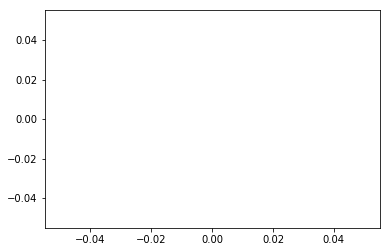

In [84]:
plt.plot()

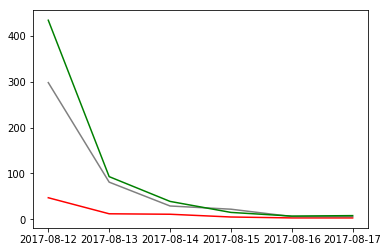

In [91]:
plt.plot(Time, count_negative, color='r')
plt.plot(Time, count_neutral, color='grey')
plt.plot(Time, count_positive, color='g')


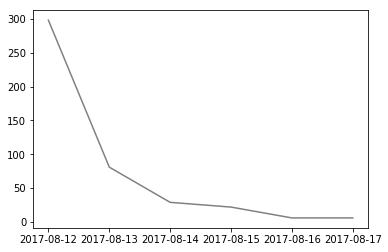

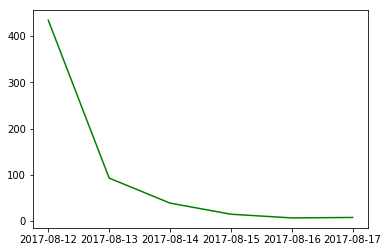

In [87]:
plt.plot(Time, count_positive, color='g')


In [89]:
plt.show

<function matplotlib.pyplot.show>

In [27]:
df.head(2).hashtags

0    women WITBragDay
1          WITBragDay
Name: hashtags, dtype: object

In [25]:
# Topics and Hashtags with Sentiments
# Only look at the hashtags
count_all_hash = Counter()
for index, row in df.iterrows():     
    terms_hash = [term for term in preprocess(row['text']) 
              if term.startswith('#')]
    # Update the counter
    count_all_hash.update(terms_hash)
print(count_all_hash.most_common(20))

[(u'#WITBragDay', 2530), (u'#WiTBragDay', 235), (u'#witbragday', 119), (u'#womenintech', 104), (u'#WITBragday', 72), (u'#WITbragday', 45), (u'#WIT', 37), (u'#WitBragDay', 32), (u'#WomenInTech', 30), (u'#tech', 29), (u'#Gyan_Ganga', 28), (u'#STEM', 26), (u'#', 26), (u'#Charlottesville', 21), (u'#Agile2017', 17), (u'#GoogleDoodle', 15), (u'#ARSLEI', 14), (u'#Tech', 13), (u'#womeninSTEM', 13), (u'#africa', 12)]


In [162]:
from pandas import Series

In [61]:
s = df["hashtags"].str.split(' ').apply(Series, 1).stack()

In [35]:
s.index = s.index.droplevel(-1)
s.name = 'hashtags'

In [36]:
s.name = 'hashtags'

In [37]:
s

0               women
0          WITBragDay
1          WITBragDay
2          WITBragDay
3          WITBragDay
4          WITBragDay
5          WITBragDay
6          WITBragDay
7          WITBragDay
8          WITBragDay
10         WITBragDay
12         WITBragDay
14         WITBragDay
15         WiTBragDay
16        sociologist
16                 FE
16          Developer
16      PyCodeCarrots
16            GirlsJS
16          workshops
16      CodeLikeAGirl
16         WITBragDay
17         WITBragDay
18         WITBragDay
20         WITBragDay
21         WITBragDay
21         WITfangirl
22         WITBragDay
25         WITBragDay
26         WITBragDay
            ...      
4382       WITBragDay
4383       WITBragDay
4384       WITBragDay
4385             grit
4385      Inspiration
4386       WITBragDay
4387       WITBragDay
4388         OSSummit
4388       WITBragDay
4390       WITBragDay
4391       WITBragDay
4392       WITBragDay
4393       WITBragDay
4394       WITBragDay
4395      

In [38]:
del df['hashtags']
df = df.join(s)
df.head(2)

In [53]:
df = df.join(s)

In [173]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date,sentiment,polarity
0,0,8,Sun Aug 13 08:32:29 +0000 2017,women WITBragDay,3 degrees in building industry and they rejected me because #women. IT industry welcomed me with open arms. Not a single regret #WITBragDay,9,en,NaN,"Wroclaw, Poland",2,NaN,2017-08-13 08:32:29,"Sentiment(polarity=0.017857142857142856, subjectivity=0.35714285714285715)",positive
1,1,13,Thu Aug 17 23:34:25 +0000 2017,WITBragDay,@azimman @LaunchDarkly sounds like you should look at the #WITBragDay tag :P,1,en,NaN,/usr/local/sin,0,NaN,2017-08-17 23:34:25,"Sentiment(polarity=0.75, subjectivity=1.0)",positive


In [65]:
df['hashtags'] = df['hashtags'].str.lower()

In [66]:
df.groupby(["hashtags", "polarity"]).size()

hashtags              polarity
1stplace              neutral      1
2017solareclipse      positive     4
23andwe               positive     1
a11y                  positive     1
abbyairshow           neutral     11
abidotchi             positive     1
abidotlocal           neutral      1
acgnj                 neutral      1
acornaccelerator2017  positive     1
acsw                  neutral      1
actwbos               positive     1
acura                 negative     1
ada                   neutral      1
adwords               positive     1
adyoyo                positive     1
afcvlcfc              neutral      1
aflcatstigers         neutral      1
aflswansfreo          neutral      1
africa                negative     6
                      neutral      6
                      positive     1
africawitbragday      neutral      1
                      positive     1
agile2017             neutral     17
                      positive     5
agilecoachcamp        positive     1
agpl   

In [67]:
new_Df = pd.DataFrame({'count' : df.groupby(["hashtags", "polarity"]).size()}).reset_index().sort_values('count', ascending=False)

In [69]:
new_Df.head(20)

,hashtags,polarity,count
829,witbragday,positive,1668
828,witbragday,neutral,1136
827,witbragday,negative,243
855,womenintech,positive,85
854,womenintech,neutral,48
819,wit,positive,30
727,tech,positive,26
698,stem,positive,21
338,gyan_ganga,neutral,20
23,agile2017,neutral,17


In [71]:
d = {}
for i in new_Df['hashtags']:
    d['hashtags'] = [{new_Df['polarity'][j]: new_Df['count'][j]} for j in new_Df[new_Df['hashtags']==i].index]
    
dfff = pd.pivot_table(new_Df, values = 'count', index=['hashtags'], columns = 'polarity').reset_index()
dfff.fillna(0)
dfff.sort_values(['negative', 'neutral', 'positive'], ascending=[False, False, False], inplace=True)

In [74]:
dfff = pd.pivot_table(new_Df, values = 'count', index=['hashtags'], columns = 'polarity').reset_index()

In [79]:
dfff.head(2)

polarity,hashtags,negative,neutral,positive
0,1stplace,NaN,1.0,NaN
1,2017solareclipse,NaN,NaN,4.0


In [81]:
dfff.fillna(0)

polarity,hashtags,negative,neutral,positive
0,1stplace,0.0,1.0,0.0
1,2017solareclipse,0.0,0.0,4.0
2,23andwe,0.0,0.0,1.0
3,a11y,0.0,0.0,1.0
4,abbyairshow,0.0,11.0,0.0
5,abidotchi,0.0,0.0,1.0
6,abidotlocal,0.0,1.0,0.0
7,acgnj,0.0,1.0,0.0
8,acornaccelerator2017,0.0,0.0,1.0
9,acsw,0.0,1.0,0.0


In [83]:
dfff.sort_values(['negative', 'neutral', 'positive'], ascending=[False, False, False], inplace=True)

In [85]:
dfff = dfff.fillna(0)
dffftop20 = dfff.head(20)

In [87]:
dffftop20 = dfff.head(20)

In [88]:
dffftop20

polarity,hashtags,negative,neutral,positive
728,witbragday,243.0,1136.0,1668.0
746,womenintech,15.0,48.0,85.0
643,tech,9.0,7.0,26.0
294,gyan_ganga,8.0,20.0,0.0
684,unitetheright,8.0,1.0,0.0
119,choicemalewebstar,8.0,0.0,0.0
18,africa,6.0,6.0,1.0
98,business,6.0,3.0,0.0
655,technology,3.0,5.0,2.0
198,entrepreneur,3.0,3.0,0.0


In [ ]:
for index, row in df.iterrows():     
    # Get the terms of each tweet while preprocessing it and remove the stop words from the tweet
    terms_stop = [term for term in preprocess(row['text']) if term not in stop and not term.startswith(r"\x")]
    # Update the counter
    count_all.update(terms_stop)
print(count_all.most_common(5))

In [98]:
d = dict([(i,[a,b,c ]) for i,a,b,c in zip(dffftop20.hashtags, dffftop20.positive,dffftop20.neutral,dffftop20.negative)])
print d

{'chocolatelegoscrum': [0.0, 0.0, 2.0], 'business': [0.0, 3.0, 6.0], 'witbrag': [6.0, 3.0, 2.0], 'choicemalewebstar': [0.0, 0.0, 8.0], 'unitetheright': [0.0, 1.0, 8.0], 'africa': [1.0, 6.0, 6.0], 'devops': [1.0, 4.0, 2.0], 'stem': [21.0, 7.0, 1.0], 'netflix': [2.0, 1.0, 1.0], 'entrepreneur': [0.0, 3.0, 3.0], 'wit': [30.0, 9.0, 1.0], 'womenintech': [85.0, 48.0, 15.0], 'charlottesville': [5.0, 14.0, 2.0], 'witbragday': [1668.0, 1136.0, 243.0], 'infosec': [3.0, 1.0, 1.0], 'gyan_ganga': [0.0, 20.0, 8.0], 'technology': [2.0, 5.0, 3.0], 'tech': [26.0, 7.0, 9.0], 'mitbragday': [1.0, 3.0, 1.0], 'women': [16.0, 4.0, 1.0]}


In [99]:
import json
values = [{"keyword": k , "freq" : {"positive": v[0], "neutral": v[1], "negative": v[2]}} for k, v in d.iteritems()]

In [101]:
json.dumps(values)

'[{"freq": {"positive": 0.0, "neutral": 0.0, "negative": 2.0}, "keyword": "chocolatelegoscrum"}, {"freq": {"positive": 0.0, "neutral": 3.0, "negative": 6.0}, "keyword": "business"}, {"freq": {"positive": 6.0, "neutral": 3.0, "negative": 2.0}, "keyword": "witbrag"}, {"freq": {"positive": 0.0, "neutral": 0.0, "negative": 8.0}, "keyword": "choicemalewebstar"}, {"freq": {"positive": 0.0, "neutral": 1.0, "negative": 8.0}, "keyword": "unitetheright"}, {"freq": {"positive": 1.0, "neutral": 6.0, "negative": 6.0}, "keyword": "africa"}, {"freq": {"positive": 1.0, "neutral": 4.0, "negative": 2.0}, "keyword": "devops"}, {"freq": {"positive": 21.0, "neutral": 7.0, "negative": 1.0}, "keyword": "stem"}, {"freq": {"positive": 2.0, "neutral": 1.0, "negative": 1.0}, "keyword": "netflix"}, {"freq": {"positive": 0.0, "neutral": 3.0, "negative": 3.0}, "keyword": "entrepreneur"}, {"freq": {"positive": 30.0, "neutral": 9.0, "negative": 1.0}, "keyword": "wit"}, {"freq": {"positive": 85.0, "neutral": 48.0, "ne

In [174]:
# all keywords
def keyword_seperator(text):
    try:
        terms = [term for term in preprocess(text) if term not in stop and
              not term.startswith(('#', '@'))]
        str_contact = ' '.join(terms)
        return str_contact
    except:
        return None

In [175]:
df['seperatedText'] = df['text'].apply(keyword_seperator)

In [176]:
df.head(3)

,Unnamed: 0,Unnamed: 0.1,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date,sentiment,polarity,seperatedText
0,0,8,Sun Aug 13 08:32:29 +0000 2017,women WITBragDay,3 degrees in building industry and they rejected me because #women. IT industry welcomed me with open arms. Not a single regret #WITBragDay,9,en,NaN,"Wroclaw, Poland",2,NaN,2017-08-13 08:32:29,"Sentiment(polarity=0.017857142857142856, subjectivity=0.35714285714285715)",positive,3 degrees building industry rejected IT industry welcomed open arms Not single regret
1,1,13,Thu Aug 17 23:34:25 +0000 2017,WITBragDay,@azimman @LaunchDarkly sounds like you should look at the #WITBragDay tag :P,1,en,NaN,/usr/local/sin,0,NaN,2017-08-17 23:34:25,"Sentiment(polarity=0.75, subjectivity=1.0)",positive,sounds like look tag :P
2,2,16,Thu Aug 17 22:15:48 +0000 2017,WITBragDay,My coding knowledge makes a difference and improves the lives of my coworkers and our customers. And it's the coolest feeling. #WITBragDay,6,en,NaN,"Zionsville, IN",2,NaN,2017-08-17 22:15:48,"Sentiment(polarity=0.0, subjectivity=0.0)",neutral,My coding knowledge makes difference improves lives coworkers customers And coolest feeling


In [177]:
s = df["seperatedText"].str.split(' ').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'seperatedText'

In [178]:
del df['seperatedText']
df = df.join(s)
df.head(2)

,Unnamed: 0,Unnamed: 0.1,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date,sentiment,polarity,seperatedText
0,0,8,Sun Aug 13 08:32:29 +0000 2017,women WITBragDay,3 degrees in building industry and they rejected me because #women. IT industry welcomed me with open arms. Not a single regret #WITBragDay,9,en,NaN,"Wroclaw, Poland",2,NaN,2017-08-13 08:32:29,"Sentiment(polarity=0.017857142857142856, subjectivity=0.35714285714285715)",positive,3
0,0,8,Sun Aug 13 08:32:29 +0000 2017,women WITBragDay,3 degrees in building industry and they rejected me because #women. IT industry welcomed me with open arms. Not a single regret #WITBragDay,9,en,NaN,"Wroclaw, Poland",2,NaN,2017-08-13 08:32:29,"Sentiment(polarity=0.017857142857142856, subjectivity=0.35714285714285715)",positive,degrees


In [179]:
df.shape

(36731, 15)

In [180]:
df['seperatedText'] = df['seperatedText'].str.lower()

In [181]:
new_Df = pd.DataFrame({'count' : df.groupby(["seperatedText", "polarity"]).size()}).reset_index().sort_values('count', ascending=False)

In [183]:
new_Df.head(10)

,seperatedText,polarity,count
6550,i,positive,734
6549,i,neutral,393
11447,women,positive,310
10457,tech,positive,272
903,awesome,positive,196
629,amp,positive,193
600,amazing,positive,189
6548,i,negative,164
7412,love,positive,162
3217,first,positive,152


In [184]:
d = {}
for i in new_Df['seperatedText']:
    d['seperatedText'] = [{new_Df['polarity'][j]: new_Df['count'][j]} for j in new_Df[new_Df['seperatedText']==i].index]
    
dfff = pd.pivot_table(new_Df, values = 'count', index=['seperatedText'], columns = 'polarity').reset_index()
dfff.fillna(0)
dfff.sort_values(['negative', 'neutral', 'positive'], ascending=[False, False, False], inplace=True)

In [185]:
dfff = dfff.fillna(0)
dffftop20 = dfff.head(20)

In [187]:
d = dict([(i,[a,b,c ]) for i,a,b,c in zip(dffftop20.seperatedText, dffftop20.positive,dffftop20.neutral,dffftop20.negative)])
print d
import json
values = [{"keyword": k , "freq" : {"positive": v[0], "neutral": v[1], "negative": v[2]}} for k, v in d.iteritems()]

{u'every': [30.0, 29.0, 16.0], u'little': [8.0, 0.0, 18.0], u'code': [89.0, 80.0, 20.0], u'god': [2.0, 24.0, 16.0], u'i': [734.0, 393.0, 164.0], u'got': [44.0, 27.0, 16.0], u'hard': [11.0, 0.0, 19.0], u'years': [55.0, 40.0, 19.0], u'late': [19.0, 0.0, 32.0], u'this': [105.0, 55.0, 15.0], u'3': [32.0, 29.0, 17.0], u'2': [44.0, 44.0, 21.0], u'tech': [272.0, 124.0, 27.0], u'know': [59.0, 33.0, 15.0], u'team': [76.0, 30.0, 16.0], u'amp': [193.0, 109.0, 28.0], u"i'm": [140.0, 55.0, 29.0], u'one': [115.0, 43.0, 17.0], u'work': [119.0, 26.0, 15.0], u'women': [310.0, 112.0, 27.0]}


In [188]:
json.dumps(values)

'[{"freq": {"positive": 30.0, "neutral": 29.0, "negative": 16.0}, "keyword": "every"}, {"freq": {"positive": 8.0, "neutral": 0.0, "negative": 18.0}, "keyword": "little"}, {"freq": {"positive": 89.0, "neutral": 80.0, "negative": 20.0}, "keyword": "code"}, {"freq": {"positive": 2.0, "neutral": 24.0, "negative": 16.0}, "keyword": "god"}, {"freq": {"positive": 734.0, "neutral": 393.0, "negative": 164.0}, "keyword": "i"}, {"freq": {"positive": 44.0, "neutral": 27.0, "negative": 16.0}, "keyword": "got"}, {"freq": {"positive": 11.0, "neutral": 0.0, "negative": 19.0}, "keyword": "hard"}, {"freq": {"positive": 55.0, "neutral": 40.0, "negative": 19.0}, "keyword": "years"}, {"freq": {"positive": 19.0, "neutral": 0.0, "negative": 32.0}, "keyword": "late"}, {"freq": {"positive": 105.0, "neutral": 55.0, "negative": 15.0}, "keyword": "this"}, {"freq": {"positive": 32.0, "neutral": 29.0, "negative": 17.0}, "keyword": "3"}, {"freq": {"positive": 44.0, "neutral": 44.0, "negative": 21.0}, "keyword": "2"}

In [7]:
# Viz for the treemap

In [8]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date,sentiment,polarity
0,0,8,Sun Aug 13 08:32:29 +0000 2017,women WITBragDay,3 degrees in building industry and they reject...,9,en,NaN,"Wroclaw, Poland",2,NaN,2017-08-13 08:32:29,"Sentiment(polarity=0.017857142857142856, subje...",positive
1,1,13,Thu Aug 17 23:34:25 +0000 2017,WITBragDay,@azimman @LaunchDarkly sounds like you should ...,1,en,NaN,/usr/local/sin,0,NaN,2017-08-17 23:34:25,"Sentiment(polarity=0.75, subjectivity=1.0)",positive


In [9]:
df.groupby(["date", "polarity"]).size()

date                 polarity
2017-08-12 04:29:43  neutral     1
2017-08-12 04:29:52  neutral     1
2017-08-12 04:31:21  positive    1
2017-08-12 04:31:53  neutral     1
2017-08-12 04:32:52  positive    1
2017-08-12 04:32:53  neutral     1
2017-08-12 04:32:57  neutral     1
2017-08-12 04:33:00  positive    1
2017-08-12 04:33:07  positive    3
2017-08-12 04:33:22  negative    1
2017-08-12 04:33:24  neutral     1
2017-08-12 04:33:31  neutral     1
2017-08-12 04:33:37  neutral     1
2017-08-12 04:33:49  positive    1
2017-08-12 04:33:50  neutral     1
2017-08-12 04:34:29  neutral     1
2017-08-12 04:34:36  positive    1
2017-08-12 04:34:37  positive    1
2017-08-12 04:35:01  neutral     1
2017-08-12 04:35:12  neutral     1
2017-08-12 04:35:56  positive    1
2017-08-12 04:36:05  positive    1
2017-08-12 04:36:20  positive    1
2017-08-12 04:36:45  positive    1
2017-08-12 04:36:56  neutral     1
2017-08-12 04:36:58  positive    1
2017-08-12 04:37:03  neutral     1
2017-08-12 04:37:50  posi

In [11]:
df.dtypes

Unnamed: 0               int64
Unnamed: 0.1             int64
created_at              object
hashtags                object
text                    object
favorite_count           int64
lang                    object
place                   object
user_location           object
retweet_count            int64
retweet_screen_name    float64
date                    object
sentiment               object
polarity                object
dtype: object

In [12]:
df['NDate'] = pd.to_datetime(df['date'])

In [14]:
df.dtypes

Unnamed: 0                      int64
Unnamed: 0.1                    int64
created_at                     object
hashtags                       object
text                           object
favorite_count                  int64
lang                           object
place                          object
user_location                  object
retweet_count                   int64
retweet_screen_name           float64
date                           object
sentiment                      object
polarity                       object
NDate                  datetime64[ns]
dtype: object

In [15]:
# Making the seconds as 0 to avg out the time for the tweets.
df['NDate'] = df['NDate'].map(lambda x: x.replace(second=0))

In [20]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date,sentiment,polarity,NDate
0,0,8,Sun Aug 13 08:32:29 +0000 2017,women WITBragDay,3 degrees in building industry and they reject...,9,en,NaN,"Wroclaw, Poland",2,NaN,2017-08-13 08:32:29,"Sentiment(polarity=0.017857142857142856, subje...",positive,2017-08-13 08:00:00
1,1,13,Thu Aug 17 23:34:25 +0000 2017,WITBragDay,@azimman @LaunchDarkly sounds like you should ...,1,en,NaN,/usr/local/sin,0,NaN,2017-08-17 23:34:25,"Sentiment(polarity=0.75, subjectivity=1.0)",positive,2017-08-17 23:00:00


In [19]:
# also get rid of the minutes
df['NDate'] = df['NDate'].map(lambda x: x.replace(minute=0))

In [21]:
df.groupby(["NDate", "polarity"]).size()

NDate                polarity
2017-08-12 04:00:00  negative      5
                     neutral      44
                     positive     55
2017-08-12 05:00:00  negative     14
                     neutral      81
                     positive    108
2017-08-12 06:00:00  negative     11
                     neutral      51
                     positive     62
2017-08-12 07:00:00  negative      5
                     neutral      59
                     positive     65
2017-08-12 08:00:00  negative     12
                     neutral      77
                     positive     89
2017-08-12 09:00:00  negative     14
                     neutral      58
                     positive     70
2017-08-12 10:00:00  negative     10
                     neutral      55
                     positive     57
2017-08-12 11:00:00  negative     10
                     neutral      43
                     positive     73
2017-08-12 12:00:00  negative      6
                     neutral      61
        

In [22]:
new_Df = pd.DataFrame({'count' : df.groupby(["NDate", "polarity"]).size()}).reset_index()

In [23]:
dfff = pd.pivot_table(new_Df, values = 'count', index=['NDate'], columns = 'polarity').reset_index()

In [24]:
dfff.head(2)

polarity,NDate,negative,neutral,positive
0,2017-08-12 04:00:00,5.0,44.0,55.0
1,2017-08-12 05:00:00,14.0,81.0,108.0


In [25]:
dfff.fillna(0)

polarity,NDate,negative,neutral,positive
0,2017-08-12 04:00:00,5.0,44.0,55.0
1,2017-08-12 05:00:00,14.0,81.0,108.0
2,2017-08-12 06:00:00,11.0,51.0,62.0
3,2017-08-12 07:00:00,5.0,59.0,65.0
4,2017-08-12 08:00:00,12.0,77.0,89.0
5,2017-08-12 09:00:00,14.0,58.0,70.0
6,2017-08-12 10:00:00,10.0,55.0,57.0
7,2017-08-12 11:00:00,10.0,43.0,73.0
8,2017-08-12 12:00:00,6.0,61.0,72.0
9,2017-08-12 13:00:00,8.0,94.0,100.0


In [26]:
dfff.to_csv("multi-line_witbrag.csv", encoding='utf-8', index=False)